<a href="https://colab.research.google.com/github/fatemafaria142/Apple_Quality_Prediction/blob/main/Apple_Quality_Prediction_using_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow keras -q

In [61]:
import pandas as pd
import numpy as np
import tensorflow
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.metrics import AUC

In [7]:
file_path = "/content/drive/MyDrive/Practice_Project_Datasets/df_filled.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print("First 5 rows:")
df.head()

First 5 rows:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [11]:
# Drop 'A_id' column
df = df.drop('A_id', axis=1)

# Extract labels (Quality) and features
labels = df['Quality']
features = df.drop('Quality', axis=1)

In [12]:
# Scale the features to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame with scaled features and encoded labels
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Quality'] = labels

In [14]:
# Display the first few rows of the scaled DataFrame
print("First 5 rows of the scaled DataFrame:")
df_scaled.head()

First 5 rows of the scaled DataFrame:


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1


In [63]:
# Split the data into features (X) and labels (y)
X = df_scaled.drop('Quality', axis=1)
y = df_scaled['Quality']

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
# Convert DataFrame to NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape the data for LSTM input (assuming a time series sequence)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [65]:
# Define the Bidirectional GRU model
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [66]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', AUC()])

In [67]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
80/80 [==============================] - 3s 12ms/step - loss: 0.6867 - accuracy: 0.5820 - auc_4: 0.6169 - val_loss: 0.6797 - val_accuracy: 0.5922 - val_auc_4: 0.7391
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6645 - auc_4: 0.7458 - val_loss: 0.6616 - val_accuracy: 0.6875 - val_auc_4: 0.7546
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6918 - auc_4: 0.7591 - val_loss: 0.6437 - val_accuracy: 0.6391 - val_auc_4: 0.7575
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.7027 - auc_4: 0.7775 - val_loss: 0.6151 - val_accuracy: 0.6844 - val_auc_4: 0.7644
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7184 - auc_4: 0.7847 - val_loss: 0.5954 - val_accuracy: 0.6969 - val_auc_4: 0.7696
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7152 - auc_4: 0.7910

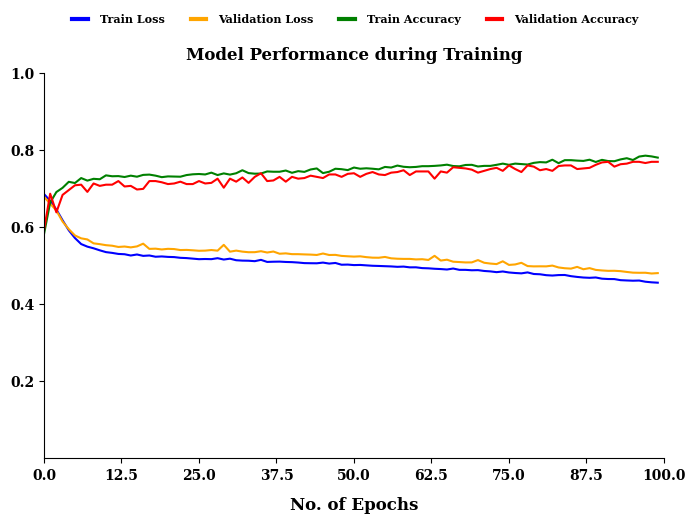

In [68]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Plot training & validation loss values
plt.figure(figsize=(8, 5))

# Plot Loss
train_loss, = plt.plot(history.history['loss'], label='Train Loss', color='blue')
val_loss, = plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
train_accuracy, = plt.plot(history.history['accuracy'], label='Train Accuracy',  color='green')
val_accuracy, = plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')


# Add a title with specified font properties
plt.title('Model Performance during Training', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12},pad=10)
# Set x-axis label with specified font properties
plt.xlabel('No. of Epochs', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})



plt.xticks(np.linspace(0, 100, num=9), fontname='Serif', weight='bold')
# Set y-axis ticks font properties
plt.yticks(np.linspace(0.2, 1, num=5), fontname='Serif', weight='bold')


plt.xlim(0, 100)
plt.ylim(0, 1)

# Define custom legend lines with desired line properties
legend_lines = [
    Line2D([0], [0], color='blue', lw=3),          # Train Loss
    Line2D([0], [0], color='orange', lw=3),       # Validation Loss
    Line2D([0], [0], color='green', lw=3),        # Train Accuracy
    Line2D([0], [0], color='red', lw=3)           # Validation Accuracy
]

# Place legend outside the graph by adjusting bbox_to_anchor and specifying it to be outside the axes
plt.legend(legend_lines, ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'],
           loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=5,
           prop={'family': 'Serif', 'weight': 'bold', 'size': 8}, frameon=False,
           handler_map={Line2D: HandlerLine2D(numpoints=5)})

# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [69]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)
# Convert probabilities to labels
y_pred_labels = y_pred.flatten().astype(int)

26/26 [==============================] - 1s 2ms/step


In [70]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)
logloss = log_loss(y_test, y_pred_prob)

In [71]:
# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {logloss}")

Accuracy: 0.7740324594257179
Precision: 0.7722772277227723
Recall: 0.7780548628428927
F1 Score: 0.7751552795031056
Log Loss: 0.46150581505695654


In [72]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[308  92]
 [ 89 312]]


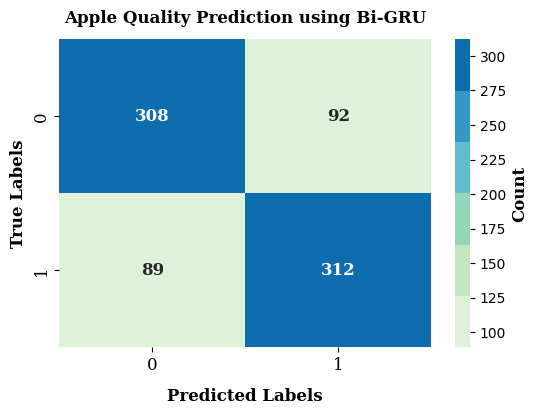

In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.color_palette(palette='GnBu')# Modify the number based on number of classes in the dataset
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=['0', '1'], yticklabels=['0', '1'],annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Apple Quality Prediction using Bi-GRU', fontdict=font, pad=12)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
plt.show()